In [2]:
import scanpy as sc
import numpy as np
import anndata as ad
import matplotlib.pyplot as plt

In [2]:
import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
import anndata2ri
%load_ext rpy2.ipython
anndata2ri.activate()

In [3]:
## set parameters for visualisation

sc.settings.set_figure_params(dpi=80)

# settings for the plots
sc.set_figure_params(scanpy=True, dpi=80, dpi_save=250,
                     frameon=True, vector_friendly=True,
                     color_map="YlGnBu", format='pdf', transparent=False,
                     ipython_format='png2x')

In [22]:
count_mat = []
genes = []
with open("/home/mrichter/macparland2018/GSE115469_Data.csv") as f:
    cell_names = f.readline()
    cell_names = cell_names.split(",")
    cell_names = cell_names[1:]
    for line in f:
        line = line.split(",")
        count_mat.append(line[1:])
        genes.append(line[0])

In [23]:
## transform the raw count matrix to be in a data format compatible with AnnData
count_mat = np.array(count_mat)
count_mat = count_mat.transpose()
count_mat.shape

(8444, 20007)

In [12]:
import pandas as pd

In [25]:
cell_names_new = []
for elem in cell_names:
    cell_names_new.append(elem[1:-1])
var_names_new = []
for elem in genes:
    var_names_new.append(elem[1:-1])

In [26]:
adata = ad.AnnData(count_mat, 
                   obs=pd.DataFrame(index=cell_names_new),
                   var=pd.DataFrame(index=var_names_new))

In [27]:
adata

AnnData object with n_obs × n_vars = 8444 × 20007

In [28]:
del count_mat

In [29]:
annot = pd.read_csv("/home/mrichter/macparland2018/GSE115469_CellClusterType.txt", sep="\t")

In [31]:
adata.obs = annot

In [32]:
adata.obs

,CellName,Sample,Cell#,Cluster#,CellType
0,P1TLH_AAACCTGAGCAGCCTC_1,P1TLH,AAACCTGAGCAGCCTC,12,Central_venous_LSECs
1,P1TLH_AAACCTGTCCTCATTA_1,P1TLH,AAACCTGTCCTCATTA,17,Cholangiocytes
2,P1TLH_AAACCTGTCTAAGCCA_1,P1TLH,AAACCTGTCTAAGCCA,12,Central_venous_LSECs
3,P1TLH_AAACGGGAGTAGGCCA_1,P1TLH,AAACGGGAGTAGGCCA,10,Non-inflammatory_Macrophage
4,P1TLH_AAACGGGGTTCGGGCT_1,P1TLH,AAACGGGGTTCGGGCT,2,alpha-beta_T_Cells
...,...,...,...,...,...
8439,P5TLH_TTTGTCAGTGTTCTTT_1,P5TLH,TTTGTCAGTGTTCTTT,17,Cholangiocytes
8440,P5TLH_TTTGTCAGTTTAGGAA_1,P5TLH,TTTGTCAGTTTAGGAA,11,Periportal_LSECs
8441,P5TLH_TTTGTCATCAGCTTAG_1,P5TLH,TTTGTCATCAGCTTAG,17,Cholangiocytes
8442,P5TLH_TTTGTCATCCACGCAG_1,P5TLH,TTTGTCATCCACGCAG,4,Inflammatory_Macrophage


In [33]:
adata.obs["replicate"] = "macparland2018"

In [34]:
adata

AnnData object with n_obs × n_vars = 8444 × 20007
    obs: 'CellName', 'Sample', 'Cell#', 'Cluster#', 'CellType', 'replicate'

In [35]:
adata.write("/home/mrichter/macparland2018/macparland_ct_mat_feb22.h5ad")

... storing 'Sample' as categorical
... storing 'Cell#' as categorical
... storing 'CellType' as categorical
... storing 'replicate' as categorical


In [4]:
adata = ad.read("/home/mrichter/macparland2018/macparland_ct_mat_feb22.h5ad")

/home/mrichter/miniconda3/envs/scgen/lib/python3.7/site-packages/anndata/_core/anndata.py:120: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [5]:
adata

AnnData object with n_obs × n_vars = 8444 × 20007
    obs: 'CellName', 'Sample', 'Cell#', 'Cluster#', 'CellType', 'replicate'

In [6]:
sc.pp.filter_cells(adata, min_genes=1)
sc.pp.filter_cells(adata, min_counts=1)

sc.pp.filter_genes(adata, min_counts=1)
sc.pp.filter_genes(adata, min_cells=3)

In [7]:
adata

AnnData object with n_obs × n_vars = 8444 × 19959
    obs: 'CellName', 'Sample', 'Cell#', 'Cluster#', 'CellType', 'replicate', 'n_genes', 'n_counts'
    var: 'n_counts', 'n_cells'

In [8]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

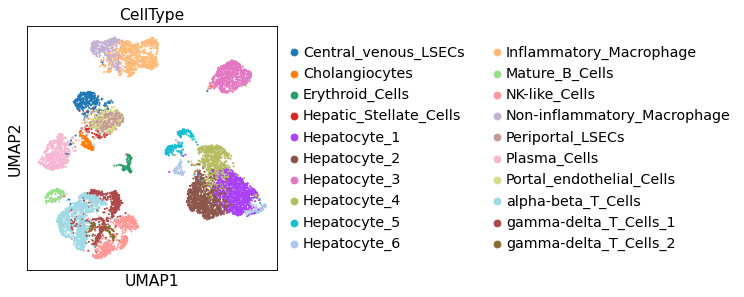

In [9]:
sc.pl.umap(adata, color="CellType")

In [10]:
annot = []
for elem in adata.obs["CellType"]:
    if elem[0:6] == "Hepato":
        annot.append("Hepatocyte")
    else:
        annot.append(elem)
adata.obs["broad_cell_type"] = annot

... storing 'broad_cell_type' as categorical


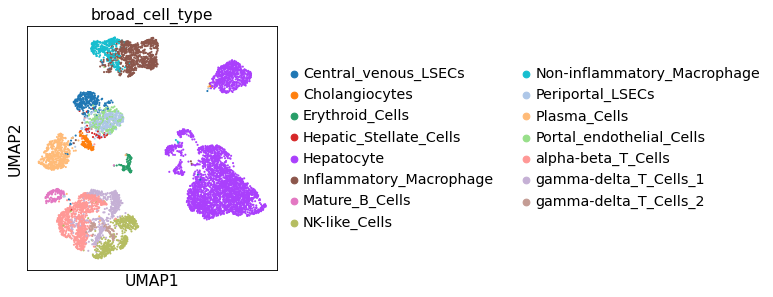

In [11]:
sc.pl.umap(adata, color="broad_cell_type")

In [13]:
sc.tl.louvain(adata, resolution=0.08)

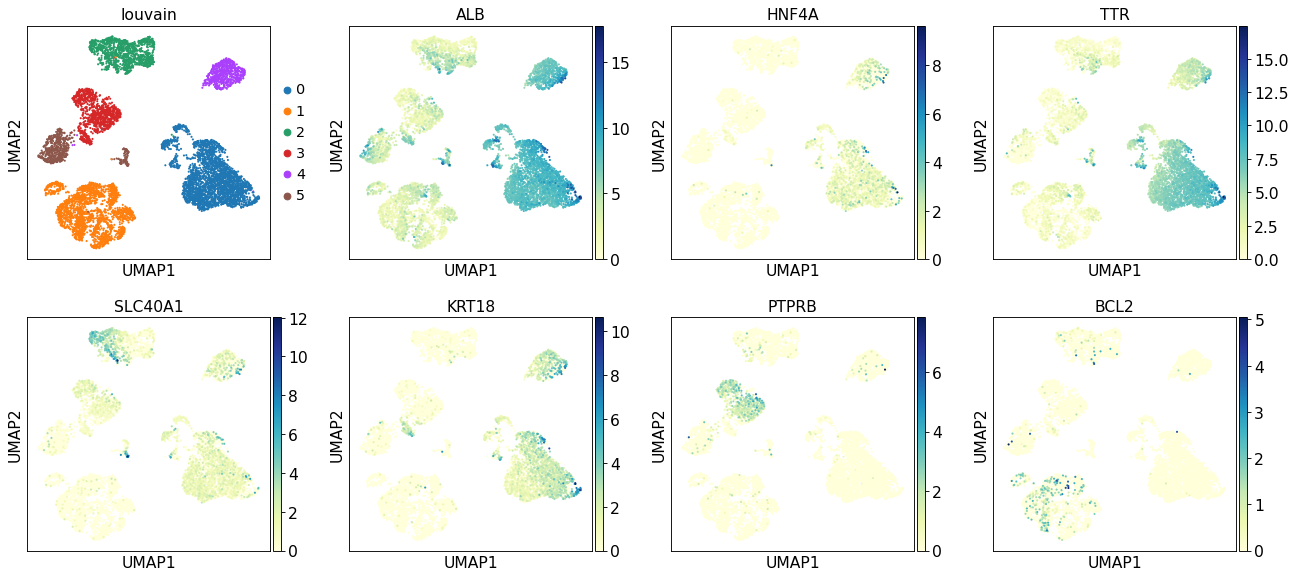

In [14]:
sc.pl.umap(adata, color=["louvain","ALB","HNF4A","TTR","SLC40A1","KRT18","PTPRB","BCL2"])

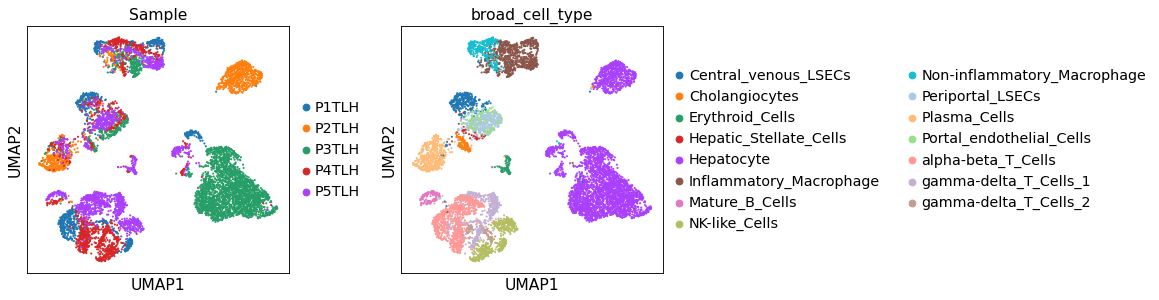

In [15]:
sc.pl.umap(adata, color=["Sample","broad_cell_type"],wspace=0.3)

In [22]:
adataH = adata1[adata1.obs["broad_cell_type"] == "Hepatocyte"]

In [23]:
sc.pp.pca(adataH)
sc.pp.neighbors(adataH)
sc.tl.umap(adataH)

In [26]:
sc.tl.louvain(adataH, resolution=0.5)

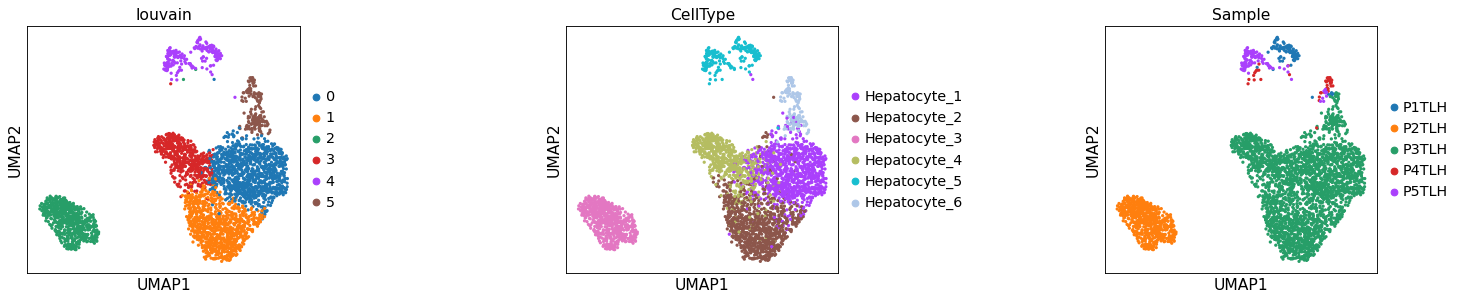

In [27]:
sc.pl.umap(adataH, color=["louvain","CellType","Sample"], wspace=0.8)

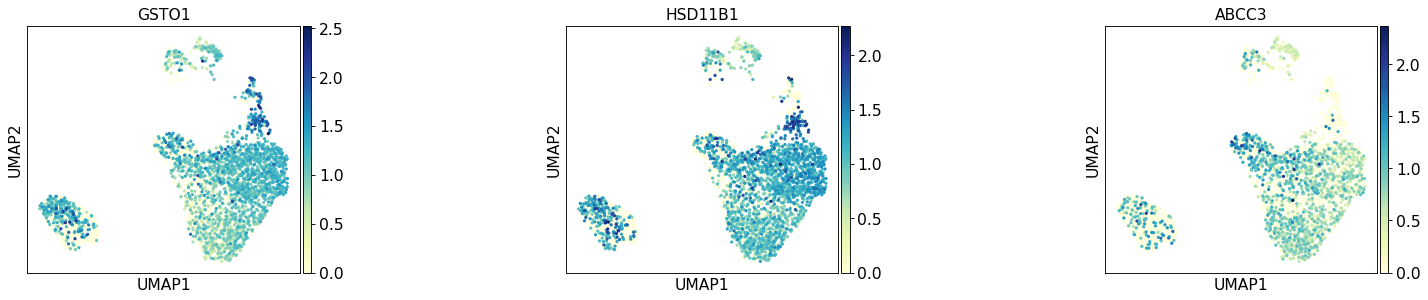

In [28]:
sc.pl.umap(adataH, color=["GSTO1","HSD11B1","ABCC3"], wspace=0.8)

... storing 'subgroups' as categorical


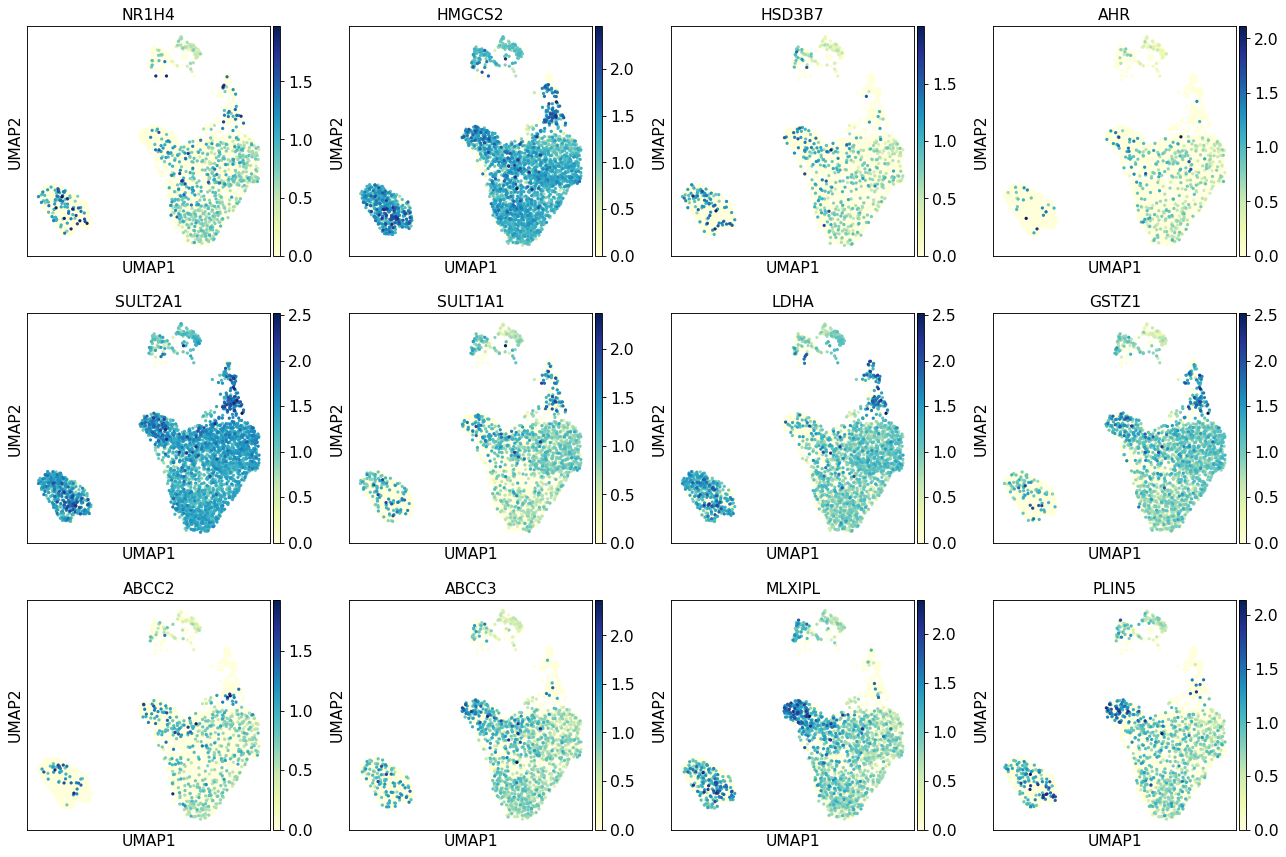

In [30]:
sc.pl.umap(adataH, color=["NR1H4","HMGCS2","HSD3B7","AHR",
                          "SULT2A1","SULT1A1","LDHA","GSTZ1",
                          "ABCC2","ABCC3","MLXIPL","PLIN5"], ncols=4)

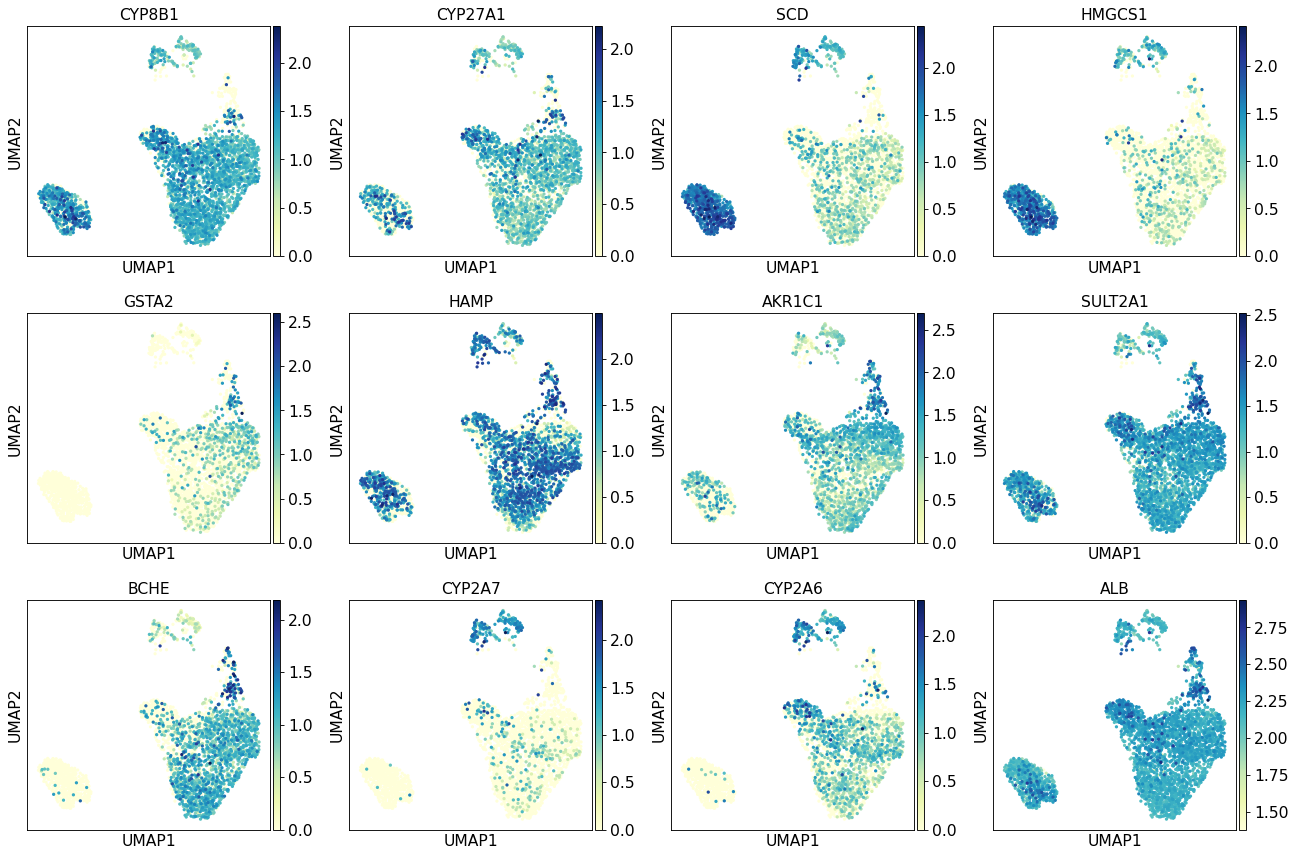

In [31]:
sc.pl.umap(adataH, color=["CYP8B1","CYP27A1","SCD","HMGCS1",
                          "GSTA2","HAMP","AKR1C1","SULT2A1",
                          "BCHE","CYP2A7","CYP2A6","ALB"])

In [37]:
annot = []
for elem in adataH.obs["louvain"]:
    if elem in ["0","1","5"]:
        annot.append("carbs_phaseII_stress")
    elif elem in ["3"]:
        annot.append("lipids_phaseIII")
    elif elem in ["2","4"]:
        annot.append("bile_sterols")
    else:
        annot.append("?")
adataH.obs["subgroups"] = annot

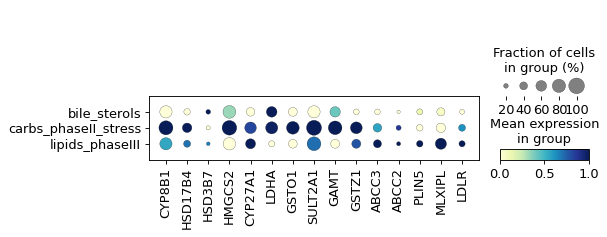

In [39]:
sc.pl.dotplot(adataH, groupby="subgroups", var_names=["CYP8B1","HSD17B4","HSD3B7","HMGCS2","CYP27A1",
                                                      "LDHA","GSTO1","SULT2A1","GAMT","GSTZ1",
                                                      #"CYP2A6","CYP2A7",
                                                      "ABCC3","ABCC2","PLIN5","MLXIPL","LDLR"],
                                                      
              cmap="YlGnBu",
              standard_scale="var",
              save="_macparland_marker_genes_20220218.pdf")

In [ ]:
adataH.write("/home/mrichter/macparland2018/macparland_annotated_hepatocytes_feb22.h5ad")